1

In [119]:
import numpy as np
import math

In [120]:
def log2_calc(x):
    if x == 0:
        return 0
    else:
        return math.log2(x)

In [121]:
def entropy_calc(numbers):
    entropy = 0
    for z in numbers:
        entropy += -z * log2_calc(z)
    return entropy

In [122]:
a = np.array((0.2, 0.2, 0.2, 0.2, 0.2))
b = np.array((0.5, 0.5))
c = np.array((0.9, 0.05, 0.05, 0))
d = np.array((0, 0, 0, 0, 1, 0))

In [123]:
print(entropy_calc(a))

2.321928094887362


In [124]:
print(entropy_calc(b))

1.0


In [125]:
print(entropy_calc(c))

0.5689955935892812


In [126]:
print(entropy_calc(d))

0.0


Так как второй вариант имеет меньшее число исходов наибольшая энтропия в первом варианте.

3

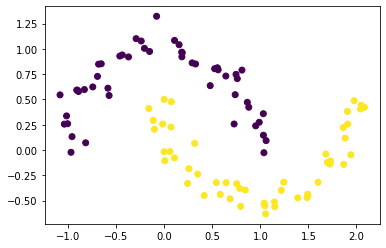

In [127]:
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt
import numpy as np


x, y = make_moons(n_samples=100, noise=0.1)
plt.scatter(x[:,0], x[:,1], c = y);

In [128]:
import matplotlib.pyplot as plt
import math
import operator

In [129]:
class Tree:
    def __init__(self, depth=1, max_num_leaf=1):
        self.depth = depth
        self.max_num_leaf = max_num_leaf
    

    def find_best_col_split(self, col, y):
        min_entropy = 10    
        n = len(y)
        for value in set(col):
            y_predict = col < value
            entropy = get_entropy(y_predict, y)
            if entropy <= min_entropy:
                min_entropy = entropy
                cutoff = value
        return min_entropy, cutoff
    

    def find_best_data_split(self, x, y):
        col = None
        min_entropy = 1
        cutoff = None
        for ind, x_col in enumerate(x.T):  
            entropy, cur_cutoff = self.find_best_col_split(x_col, y)
            if entropy == 0:    
                return ind, cur_cutoff, entropy
            elif entropy <= min_entropy:  
                min_entropy = entropy
                col = ind
                cutoff = cur_cutoff
        return col, cutoff, min_entropy


    def fit(self, x, y, node={}, current_depth=0):
        if node is None: 
            return None
        elif len(y) == 0: 
            return None
        elif all(item == y[0] for item in y): 
            return {'val':y[0]}
        else:   
            column, cutoff, entropy = self.find_best_data_split(x, y)   
            y_left = y[x[:, column] < cutoff]  
            y_right = y[x[:, column] >= cutoff]  
            node = {'index_col':column, 'cutoff':cutoff, 'val': np.round(np.mean(y))}
            if current_depth == self.depth:
                y_left_max_class = {}; y_right_max_class = {}; 
                for item in set(y_left):
                    y_left_max_class[item] = sum(y_left[y_left == item])
                node['left'] = {'val': max(y_left_max_class.items(), key=operator.itemgetter(1))[0]}
                for item in set(y_right):
                    y_right_max_class[item] = sum(y_right[y_right == item])
                node['right'] = {'val': max(y_right_max_class.items(), key=operator.itemgetter(1))[0]}
                print(max(y_left_max_class.items(), key=operator.itemgetter(1))[0])
                print(f'val = {y_left_max_class}')
                print(f'depth = {self.depth}\n')
                print(max(y_right_max_class.items(), key=operator.itemgetter(1))[0])
                print(f'val = {y_right_max_class}')
                print(f'depth = {self.depth}\n')
                return node
            node['left'] = self.fit(x[x[:, column] < cutoff], y_left, {}, current_depth+1)   
            node['right'] = self.fit(x[x[:, column] >= cutoff], y_right, {}, current_depth+1)  
            self.depth += 1 
            self.trees = node  
        return node
    
    def predict(self, x):
        results = np.array([0]*len(x))
        for i, c in enumerate(x): 
            results[i] = self._get_prediction(c)  
        return results

    def _get_prediction(self, row):
        cur_layer = self.trees 
        try:
            while cur_layer.get('cutoff'):  
                if row[cur_layer['index_col']] < cur_layer['cutoff']: 
                    cur_layer = cur_layer['left']
                else:
                    cur_layer = cur_layer['right']
            else:   
                return cur_layer.get('val')
        except:
            return cur_layer.get('val')

In [130]:
def drawing(list, X, Y,  h=.03, cmap=plt.cm.coolwarm):
    
    x_min, x_max = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
    y_min, y_max = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = list.predict(np.c_[xx.ravel(),  yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,7))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=.5)
    plt.scatter(x[:,0], x[:,1], s=200, c = Y, cmap=cmap);

    
def accuracy_func(y_test, y_pred):
    print(classification_report(y_test, y_pred))  
    print("Accuracy:", accuracy_score(y_test, y_pred))

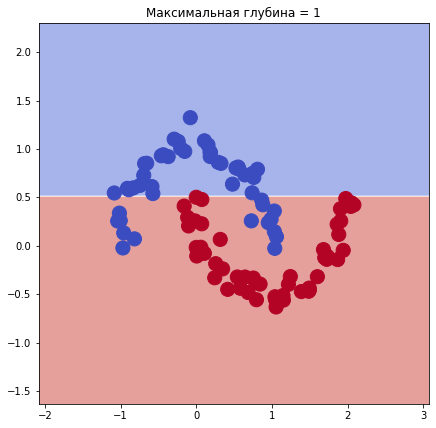

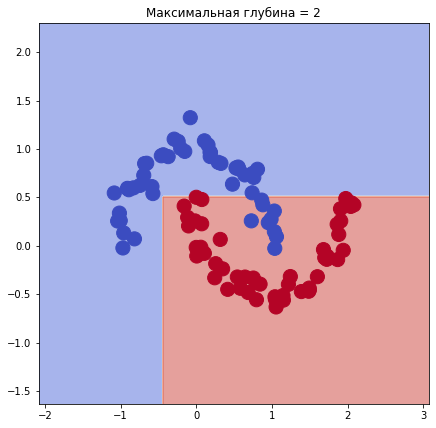

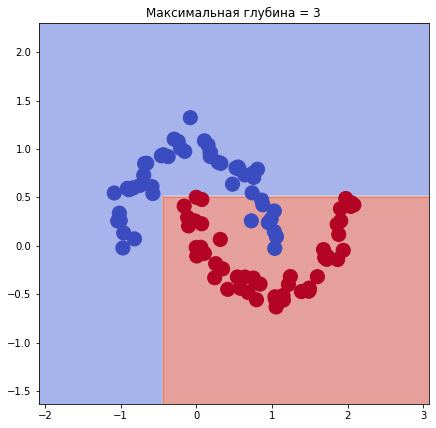

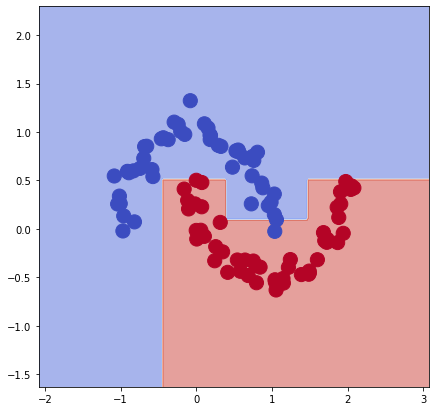

In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

for k in range(1, 4):
    list = DecisionTreeClassifier(max_depth=k)
    list.fit(x_train, y_train)
    drawing(list, x, y)
    plt.title(f'Максимальная глубина = {k}')
    plt.show()

list = DecisionTreeClassifier()
list.fit(x_train, y_train)
drawing(list, x, y)
plt.show()